In [175]:
# Importing libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [176]:
# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우 '맑은 고딕'
# Mac의 경우: plt.rcParams['font.family'] = 'AppleGothic'
# Linux의 경우 적절한 한글 폰트를 설치해야 함 (예: 'NanumGothic')

# 음수 기호가 깨지는 문제 해결 (minus 폰트 설정)
plt.rcParams['axes.unicode_minus'] = False

In [161]:
# 가열일보 Loading
df = pd.read_excel('가열일보_303F.xlsx')
df['일련번호'] =df['일련번호'].fillna(0).astype(int)
df.head()

d:\220413_문서중앙화_Backup\python_Study\303F\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,근,조,LOTNO,일련번호,STRNO,SERNO,HEATNO,회수재여부,사내강종,구사내강종,...,불량명,결함깊이,중량,원인공정,판정코드,조치코드,검사일,검사자,검사조,생산품질(Event내역)
0,3.0,A,B2B0670000,1,NaN,NaN,S52381,N,STS303FS8,NEWCOMSPEC,...,[공백],0.0,NaN,NaN,NaN,NaN,2023-01-13,황준우,B,NaN
1,3.0,A,B2B0670000,2,NaN,NaN,S52381,N,STS303FS8,NEWCOMSPEC,...,[공백],0.0,NaN,NaN,NaN,NaN,2023-01-13,황준우,B,NaN
2,3.0,A,B2B0670000,3,NaN,NaN,S52381,N,STS303FS8,NEWCOMSPEC,...,[공백],0.0,NaN,NaN,NaN,NaN,2023-01-13,황준우,B,NaN
3,3.0,A,B2B0670000,4,NaN,NaN,S52381,N,STS303FS8,NEWCOMSPEC,...,[공백],0.0,NaN,NaN,NaN,NaN,2023-01-13,하광성,B,NaN
4,3.0,A,B2B0670000,5,NaN,NaN,S52381,N,STS303FS8,NEWCOMSPEC,...,[공백],0.0,NaN,NaN,NaN,NaN,2023-01-13,황준우,B,NaN


In [162]:
# CP3 Loading
df1 = pd.read_excel('CP3_303F.xlsx')
df['일련번호'] =df['일련번호'].fillna(0).astype(int)
df1.head()

d:\220413_문서중앙화_Backup\python_Study\303F\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,근,조,LOTNO,분할LON_NO,HEATNO,회수재여부,일련번호,StrNo,SerNo,Result,...,원인공정,조치코드,결함부길이,Descaler압력,설비,지연시간,생산품질(Event내역),조압연,중간압연,사상압연
0,3,A,B2B0670000,B2B0670000,S52381,N,1,NaN,NaN,NaN,...,NaN,NaN,NaN,1.42,NaN,NaN,NaN,NaN,NaN,NaN
1,3,A,B2B0670000,B2B0670001,S52381,N,2,NaN,NaN,NaN,...,NaN,NaN,NaN,1.66,NaN,NaN,NaN,NaN,NaN,NaN
2,3,A,B2B0670000,B2B0670002,S52381,N,3,NaN,NaN,NaN,...,NaN,NaN,NaN,1.66,NaN,NaN,NaN,NaN,NaN,NaN
3,3,A,B2B0670000,B2B0670003,S52381,N,4,NaN,NaN,NaN,...,NaN,NaN,NaN,1.66,NaN,NaN,NaN,NaN,NaN,NaN
4,3,A,B2B0670000,B2B0670004,S52381,N,5,NaN,NaN,NaN,...,NaN,NaN,NaN,1.66,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
#병합을 위해 새로운 Key값 생성_가열일보(df)
df['병합Lot'] = df['LOTNO']+df['일련번호'].astype(str)
df.head()

,근,조,LOTNO,일련번호,STRNO,SERNO,HEATNO,회수재여부,사내강종,구사내강종,...,결함깊이,중량,원인공정,판정코드,조치코드,검사일,검사자,검사조,생산품질(Event내역),병합Lot
0,3.0,A,B2B0670000,1,NaN,NaN,S52381,N,STS303FS8,NEWCOMSPEC,...,0.0,NaN,NaN,NaN,NaN,2023-01-13,황준우,B,NaN,B2B06700001
1,3.0,A,B2B0670000,2,NaN,NaN,S52381,N,STS303FS8,NEWCOMSPEC,...,0.0,NaN,NaN,NaN,NaN,2023-01-13,황준우,B,NaN,B2B06700002
2,3.0,A,B2B0670000,3,NaN,NaN,S52381,N,STS303FS8,NEWCOMSPEC,...,0.0,NaN,NaN,NaN,NaN,2023-01-13,황준우,B,NaN,B2B06700003
3,3.0,A,B2B0670000,4,NaN,NaN,S52381,N,STS303FS8,NEWCOMSPEC,...,0.0,NaN,NaN,NaN,NaN,2023-01-13,하광성,B,NaN,B2B06700004
4,3.0,A,B2B0670000,5,NaN,NaN,S52381,N,STS303FS8,NEWCOMSPEC,...,0.0,NaN,NaN,NaN,NaN,2023-01-13,황준우,B,NaN,B2B06700005


In [164]:
#병합을 위해 새로운 Key값 생성_CP3(df1)
df1['병합Lot'] = df1['LOTNO']+df1['일련번호'].astype(str)
df1.head()

,근,조,LOTNO,분할LON_NO,HEATNO,회수재여부,일련번호,StrNo,SerNo,Result,...,조치코드,결함부길이,Descaler압력,설비,지연시간,생산품질(Event내역),조압연,중간압연,사상압연,병합Lot
0,3,A,B2B0670000,B2B0670000,S52381,N,1,NaN,NaN,NaN,...,NaN,NaN,1.42,NaN,NaN,NaN,NaN,NaN,NaN,B2B06700001
1,3,A,B2B0670000,B2B0670001,S52381,N,2,NaN,NaN,NaN,...,NaN,NaN,1.66,NaN,NaN,NaN,NaN,NaN,NaN,B2B06700002
2,3,A,B2B0670000,B2B0670002,S52381,N,3,NaN,NaN,NaN,...,NaN,NaN,1.66,NaN,NaN,NaN,NaN,NaN,NaN,B2B06700003
3,3,A,B2B0670000,B2B0670003,S52381,N,4,NaN,NaN,NaN,...,NaN,NaN,1.66,NaN,NaN,NaN,NaN,NaN,NaN,B2B06700004
4,3,A,B2B0670000,B2B0670004,S52381,N,5,NaN,NaN,NaN,...,NaN,NaN,1.66,NaN,NaN,NaN,NaN,NaN,NaN,B2B06700005


In [165]:
#가열일보+CP3
merged_df = pd.merge(df, df1, on='병합Lot', how='left')

# '시간' 열을 문자열로 변환하고, 분으로 변환하여 새로운 열 '분' 추가
merged_df['가열대_분'] =merged_df['가열대'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]) if isinstance(x, str) else None)
merged_df['균열대_분'] =merged_df['균열대'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]) if isinstance(x, str) else None)  
merged_df['총재로_분'] =merged_df['계'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]) if isinstance(x, str) else None)


# 문자열을 datetime 타입으로 변환
merged_df['압연시작일자_x'] = pd.to_datetime(merged_df['압연시작일자_x'])

# '년-월' 열을 생성
merged_df['year_month'] = merged_df['압연시작일자_x'].dt.strftime('%Y-%m')

# 'Heat_no'와 '년-월'을 결합한 새로운 열 생성
merged_df['Heat_no_year_month'] = merged_df['year_month'] + '-' + merged_df['HEATNO_x'].astype(str)

# 결과 출력
print(merged_df)

# 병합된 데이터를 새로운 파일로 저장
merged_df.to_excel('merged_file.xlsx', index=False)

      근_x  조_x     LOTNO_x  일련번호_x  STRNO  SERNO HEATNO_x 회수재여부_x     사내강종_x  \
0     3.0    A  B2B0670000       1    NaN    NaN   S52381       N  STS303FS8   
1     3.0    A  B2B0670000       2    NaN    NaN   S52381       N  STS303FS8   
2     3.0    A  B2B0670000       3    NaN    NaN   S52381       N  STS303FS8   
3     3.0    A  B2B0670000       4    NaN    NaN   S52381       N  STS303FS8   
4     3.0    A  B2B0670000       5    NaN    NaN   S52381       N  STS303FS8   
...   ...  ...         ...     ...    ...    ...      ...     ...        ...   
3697  3.0    B  B470897700       1    1.0    8.0   S58216       N  STS303FS8   
3698  3.0    B  B480765600       1    6.0    6.0   S58822       N  STS303FS8   
3699  3.0    B  B480765700       1    4.0    1.0   S58558       N  STS303FS8   
3700  3.0    B  B480765700       2    1.0   11.0   S58558       N  STS303FS8   
3701  NaN  NaN         NaN       0    NaN    NaN      NaN     NaN        NaN   

         구사내강종_x  ... 지연시간 생산품질(Event내역

C:\Users\seah\AppData\Local\Temp\ipykernel_21060\3069564819.py:11: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  plt.tight_layout()
C:\Users\seah\AppData\Local\Temp\ipykernel_21060\3069564819.py:11: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from current font.
  plt.tight_layout()
C:\Users\seah\AppData\Local\Temp\ipykernel_21060\3069564819.py:11: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  plt.tight_layout()
C:\Users\seah\AppData\Local\Temp\ipykernel_21060\3069564819.py:11: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
d:\220413_문서중앙화_Backup\python_Study\303F\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\220413_문서중앙화_Backup\python_Study\303F\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50676 (\N{HANG

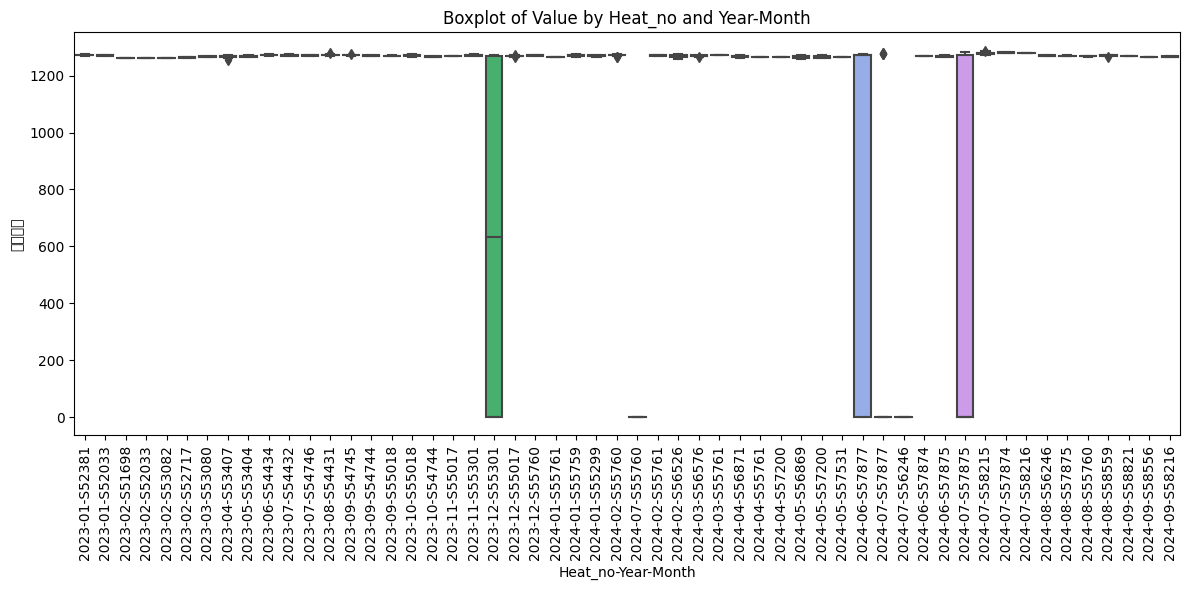

In [166]:
filtered_df_5_5 = merged_df[merged_df['지시외경']==5.5]


# 박스플롯 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(x='Heat_no_year_month', y='균열대.1', data=filtered_df_5_5)
plt.xticks(rotation=90)
plt.title('Boxplot of Value by Heat_no and Year-Month')
plt.xlabel('Heat_no-Year-Month')
plt.ylabel('균열온도')
plt.tight_layout()
plt.show()

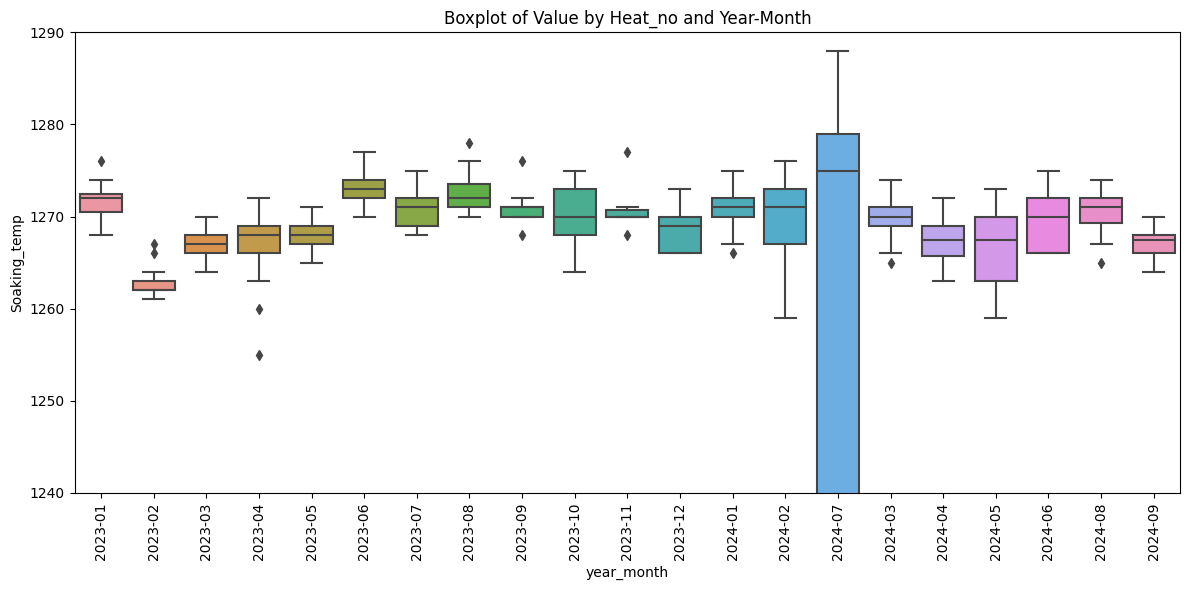

In [167]:
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

# 문자열을 datetime 타입으로 변환
#merged_df['압연시작일자_x'] = pd.to_datetime(merged_df['압연시작일자_x'])

#filtered_df_5_5 = merged_df[merged_df['지시외경']==5.5]

# '년-월' 열을 생성
#filtered_df_5_5['year_month'] = filtered_df_5_5['압연시작일자_x'].dt.strftime('%Y-%m')

# 'Heat_no'와 '년-월'을 결합한 새로운 열 생성
#filtered_df_5_5['Heat_no_year_month'] = filtered_df_5_5['HEATNO_x'].astype(str) + '-' + filtered_df_5_5['year_month']

# 박스플롯 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(x='year_month', y='균열대.1', data=filtered_df_5_5)
plt.xticks(rotation=90)
plt.title('Boxplot of Value by Heat_no and Year-Month')
plt.xlabel('year_month')
plt.ylabel('Soaking_temp')

plt.ylim(1240,1290)

plt.tight_layout()
plt.show()

In [168]:
# 고유한 '지시 외경' 값 가져오기
unique_conditions = merged_df['지시외경'].unique()

# 그래프를 저장할 폴더 생성
output_folder = 'soaking_box_plots'  # 폴더 이름
os.makedirs(output_folder, exist_ok=True)  # 폴더가 없으면 생성

# 각 필터 조건에 대해 box plot 생성
for condition in unique_conditions:
    filtered_df = merged_df[merged_df['지시외경'] == condition]  # 특정 조건으로 필터링

    if not filtered_df.empty:  # 필터링된 데이터가 있는 경우에만 그래프 그리기

        # year_month를 문자열로 변환하여 정렬
        filtered_df = filtered_df.sort_values(by='year_month')  # x축 오름차순 정렬

        plt.figure(figsize=(12, 6))
        
        # Seaborn으로 box plot 그리기
        sns.boxplot(x='year_month', y='균열대.1', data=filtered_df)

        # 그래프 제목 및 축 레이블 설정
        plt.xticks(rotation=90)
        plt.title(f'Box Plot of Values by Year-Month for {condition}')
        plt.xlabel('Year-Month')
        plt.ylabel('Soaking_Temp')

        # y축 범위 지정 (필요에 따라 조정)
        plt.ylim(1240,1300)  # y축 범위 조정

        # 레이아웃 조정 (그래프에서 데이터가 잘리지 않도록)
        plt.tight_layout()

        # 그래프 저장 (조건에 따라 파일 이름 설정)
        # plt.savefig(f'box_plot_{condition}.png', dpi=300)  # dpi는 해상도

        # 그래프 저장 (조건에 따라 파일 이름 설정)
        plt.savefig(os.path.join(output_folder, f'box_plot_Heating_{condition}.png'), dpi=300)  # dpi는 해상도

        plt.close()  # 그래프를 닫아 메모리 관리

# 완료 메시지
print("모든 box plot 그래프가 저장되었습니다.")

모든 box plot 그래프가 저장되었습니다.


In [169]:
# 고유한 '지시 외경' 값 가져오기
unique_conditions = merged_df['지시외경'].unique()

# 그래프를 저장할 폴더 생성
output_folder = 'heating_box_plots'  # 폴더 이름
os.makedirs(output_folder, exist_ok=True)  # 폴더가 없으면 생성

# 각 필터 조건에 대해 box plot 생성
for condition in unique_conditions:
    filtered_df = merged_df[merged_df['지시외경'] == condition]  # 특정 조건으로 필터링

    if not filtered_df.empty:  # 필터링된 데이터가 있는 경우에만 그래프 그리기
        # year_month를 문자열로 변환하여 정렬
        filtered_df = filtered_df.sort_values(by='year_month')  # x축 오름차순 정렬

        plt.figure(figsize=(12, 6))
        
        # Seaborn으로 box plot 그리기
        sns.boxplot(x='year_month', y='가열대.1', data=filtered_df)

        # 그래프 제목 및 축 레이블 설정
        plt.xticks(rotation=90)
        plt.title(f'Box Plot of Values by Year-Month for {condition}')
        plt.xlabel('Year-Month')
        plt.ylabel('Heating_Temp')

        # y축 범위 지정 (필요에 따라 조정)
        plt.ylim(1050,1250)  # y축 범위 조정

        # 레이아웃 조정 (그래프에서 데이터가 잘리지 않도록)
        plt.tight_layout()

        # 그래프 저장 (조건에 따라 파일 이름 설정)
        #plt.savefig(f'box_plot_Heating_{condition}.png', dpi=300)  # dpi는 해상도

        # 그래프 저장 (조건에 따라 파일 이름 설정)
        plt.savefig(os.path.join(output_folder, f'box_plot_Heating_{condition}.png'), dpi=300)  # dpi는 해상도

        plt.close()  # 그래프를 닫아 메모리 관리

# 완료 메시지
print("모든 box plot 그래프가 저장되었습니다.")

모든 box plot 그래프가 저장되었습니다.


In [170]:
# 고유한 '지시 외경' 값 가져오기
unique_conditions = merged_df['지시외경'].unique()

# 그래프를 저장할 폴더 생성
output_folder = '가열대_재로시간'  # 폴더 이름
os.makedirs(output_folder, exist_ok=True)  # 폴더가 없으면 생성

# 각 필터 조건에 대해 box plot 생성
for condition in unique_conditions:
    filtered_df = merged_df[merged_df['지시외경'] == condition]  # 특정 조건으로 필터링

    if not filtered_df.empty:  # 필터링된 데이터가 있는 경우에만 그래프 그리기
        # year_month를 문자열로 변환하여 정렬
        filtered_df = filtered_df.sort_values(by='year_month')  # x축 오름차순 정렬

        plt.figure(figsize=(12, 6))
        
        # Seaborn으로 box plot 그리기
        sns.boxplot(x='year_month', y='가열대_분', data=filtered_df)

        # 그래프 제목 및 축 레이블 설정
        plt.xticks(rotation=90)
        plt.title(f'Box Plot of Values by Year-Month for {condition}')
        plt.xlabel('Year-Month')
        plt.ylabel('Heating_Temp')

        # y축 범위 지정 (필요에 따라 조정)
        #plt.ylim(0,240)  # y축 범위 조정

        # 레이아웃 조정 (그래프에서 데이터가 잘리지 않도록)
        plt.tight_layout()

        # 그래프 저장 (조건에 따라 파일 이름 설정)
        #plt.savefig(f'box_plot_Heating_{condition}.png', dpi=300)  # dpi는 해상도

        # 그래프 저장 (조건에 따라 파일 이름 설정)
        plt.savefig(os.path.join(output_folder, f'box_plot_Heating_min_{condition}.png'), dpi=300)  # dpi는 해상도

        plt.close()  # 그래프를 닫아 메모리 관리

# 완료 메시지
print("모든 box plot 그래프가 저장되었습니다.")

모든 box plot 그래프가 저장되었습니다.


In [171]:
# 고유한 '지시 외경' 값 가져오기
unique_conditions = merged_df['지시외경'].unique()

# 그래프를 저장할 폴더 생성
output_folder = '균열대_재로시간'  # 폴더 이름
os.makedirs(output_folder, exist_ok=True)  # 폴더가 없으면 생성

# 각 필터 조건에 대해 box plot 생성
for condition in unique_conditions:
    filtered_df = merged_df[merged_df['지시외경'] == condition]  # 특정 조건으로 필터링

    if not filtered_df.empty:  # 필터링된 데이터가 있는 경우에만 그래프 그리기
        # year_month를 문자열로 변환하여 정렬
        filtered_df = filtered_df.sort_values(by='year_month')  # x축 오름차순 정렬

        plt.figure(figsize=(12, 6))
        
        # Seaborn으로 box plot 그리기
        sns.boxplot(x='year_month', y='균열대_분', data=filtered_df)

        # 그래프 제목 및 축 레이블 설정
        plt.xticks(rotation=90)
        plt.title(f'Box Plot of Values by Year-Month for {condition}')
        plt.xlabel('Year-Month')
        plt.ylabel('Heating_Temp')

        # y축 범위 지정 (필요에 따라 조정)
        #plt.ylim(0,240)  # y축 범위 조정

        # 레이아웃 조정 (그래프에서 데이터가 잘리지 않도록)
        plt.tight_layout()

        # 그래프 저장 (조건에 따라 파일 이름 설정)
        #plt.savefig(f'box_plot_Heating_{condition}.png', dpi=300)  # dpi는 해상도

        # 그래프 저장 (조건에 따라 파일 이름 설정)
        plt.savefig(os.path.join(output_folder, f'box_plot_Soaking_min_{condition}.png'), dpi=300)  # dpi는 해상도

        plt.close()  # 그래프를 닫아 메모리 관리

# 완료 메시지
print("모든 box plot 그래프가 저장되었습니다.")

모든 box plot 그래프가 저장되었습니다.


In [172]:
# 고유한 '지시 외경' 값 가져오기
unique_conditions = merged_df['지시외경'].unique()

# 그래프를 저장할 폴더 생성
output_folder = '총재로시간'  # 폴더 이름
os.makedirs(output_folder, exist_ok=True)  # 폴더가 없으면 생성

# 각 필터 조건에 대해 box plot 생성
for condition in unique_conditions:
    filtered_df = merged_df[merged_df['지시외경'] == condition]  # 특정 조건으로 필터링

    if not filtered_df.empty:  # 필터링된 데이터가 있는 경우에만 그래프 그리기
        # year_month를 문자열로 변환하여 정렬
        filtered_df = filtered_df.sort_values(by='year_month')  # x축 오름차순 정렬

        plt.figure(figsize=(12, 6))
        
        # Seaborn으로 box plot 그리기
        sns.boxplot(x='year_month', y='총재로_분', data=filtered_df)

        # 그래프 제목 및 축 레이블 설정
        plt.xticks(rotation=90)
        plt.title(f'Box Plot of Values by Year-Month for {condition}')
        plt.xlabel('Year-Month')
        plt.ylabel('Heating_Temp')

        # y축 범위 지정 (필요에 따라 조정)
        #plt.ylim(0,240)  # y축 범위 조정

        # 레이아웃 조정 (그래프에서 데이터가 잘리지 않도록)
        plt.tight_layout()

        # 그래프 저장 (조건에 따라 파일 이름 설정)
        #plt.savefig(f'box_plot_Heating_{condition}.png', dpi=300)  # dpi는 해상도

        # 그래프 저장 (조건에 따라 파일 이름 설정)
        plt.savefig(os.path.join(output_folder, f'box_plot_total_min_{condition}.png'), dpi=300)  # dpi는 해상도

        plt.close()  # 그래프를 닫아 메모리 관리

# 완료 메시지
print("모든 box plot 그래프가 저장되었습니다.")

모든 box plot 그래프가 저장되었습니다.


In [184]:
# 고유한 '지시 외경' 값 가져오기
unique_conditions = merged_df['지시외경'].unique()

# 그래프를 저장할 폴더 생성
output_folder = 'Induction'  # 폴더 이름
os.makedirs(output_folder, exist_ok=True)  # 폴더가 없으면 생성

# 각 필터 조건에 대해 box plot 생성
for condition in unique_conditions:
    filtered_df = merged_df[merged_df['지시외경'] == condition]  # 특정 조건으로 필터링

    if not filtered_df.empty:  # 필터링된 데이터가 있는 경우에만 그래프 그리기
        # year_month를 문자열로 변환하여 정렬
        filtered_df = filtered_df.sort_values(by='year_month')  # x축 오름차순 정렬
        selected_df = filtered_df[['year_month','인덕션히터전면1_온도','인덕션히터전면2_온도','인덕션히터중앙_온도','인덕션히터후면_온도']]
        filtered_melted = selected_df.melt(id_vars=['year_month'], var_name='Series', value_name='Temperature') 

        plt.figure(figsize=(12, 6))
        
        # Seaborn으로 box plot 그리기
        sns.boxplot(x='year_month', y='Temperature', hue='Series', data=filtered_melted)

        # 그래프 제목 및 축 레이블 설정
        plt.xticks(rotation=90)
        plt.title(f'Box Plot of Values by Year-Month for {condition}')
        plt.xlabel('Year-Month')
        plt.ylabel('Temperature(℃)')

        # 각 월 사이 중앙에 그리드 추가
        num_months = len(filtered_melted['year_month'].unique())
        for i in range(num_months - 1):
            plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=0.4)  # 각 월 사이의 중앙에 수직선 추가

        # 그리드 추가
        plt.grid(axis='y', color='gray',linestyle='--', linewidth=0.4)  # y축 기준으로 그리드 추가
        
        # y축 범위 지정 (필요에 따라 조정)
        plt.ylim(900,1200)  # y축 범위 조정

        # 레이아웃 조정 (그래프에서 데이터가 잘리지 않도록)
        plt.tight_layout()

        # 그래프 저장 (조건에 따라 파일 이름 설정)
        #plt.savefig(f'box_plot_Heating_{condition}.png', dpi=300)  # dpi는 해상도

        # 그래프 저장 (조건에 따라 파일 이름 설정)
        plt.savefig(os.path.join(output_folder, f'box_plot_induction_temp_{condition}.png'), dpi=300)  # dpi는 해상도

        plt.close()  # 그래프를 닫아 메모리 관리

# 완료 메시지
print("모든 box plot 그래프가 저장되었습니다.")

모든 box plot 그래프가 저장되었습니다.


In [185]:
# 인덕션 4번만 그래프 그리기

# 고유한 '지시 외경' 값 가져오기
unique_conditions = merged_df['지시외경'].unique()

# 그래프를 저장할 폴더 생성
output_folder = 'Induction4'  # 폴더 이름
os.makedirs(output_folder, exist_ok=True)  # 폴더가 없으면 생성

# 각 필터 조건에 대해 box plot 생성
for condition in unique_conditions:
    filtered_df = merged_df[merged_df['지시외경'] == condition]  # 특정 조건으로 필터링

    if not filtered_df.empty:  # 필터링된 데이터가 있는 경우에만 그래프 그리기
        # year_month를 문자열로 변환하여 정렬
        filtered_df = filtered_df.sort_values(by='year_month')  # x축 오름차순 정렬

        plt.figure(figsize=(12, 6))
        
        # Seaborn으로 box plot 그리기
        sns.boxplot(x='year_month', y='인덕션히터후면_온도', data=filtered_df)

        # 그래프 제목 및 축 레이블 설정
        plt.xticks(rotation=90)
        plt.title(f'Box Plot of Values by Year-Month for {condition}')
        plt.xlabel('Year-Month')
        plt.ylabel('Temperature(℃)')

        # 그리드 추가
        plt.grid(True, color='gray',linestyle='--', linewidth=0.4)  # y축 기준으로 그리드 추가

        # y축 범위 지정 (필요에 따라 조정)
        plt.ylim(900,1200)  # y축 범위 조정

        # 레이아웃 조정 (그래프에서 데이터가 잘리지 않도록)
        plt.tight_layout()

        # 그래프 저장 (조건에 따라 파일 이름 설정)
        #plt.savefig(f'box_plot_Heating_{condition}.png', dpi=300)  # dpi는 해상도

        # 그래프 저장 (조건에 따라 파일 이름 설정)
        plt.savefig(os.path.join(output_folder, f'box_plot_induction_temp4_{condition}.png'), dpi=300)  # dpi는 해상도

        plt.close()  # 그래프를 닫아 메모리 관리

# 완료 메시지
print("모든 box plot 그래프가 저장되었습니다.")

모든 box plot 그래프가 저장되었습니다.
